# Simple CNN example for classificaiton

Let's see how we can build a super simple CNN classifier for images.

## 1. Open the images

In [1]:
import os

dataset_folder = "dataset"

# Training data folder
train_dir = os.path.join(dataset_folder, 'train')
# Test data folder
validation_dir = os.path.join(dataset_folder, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

## 2. Create the model

In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

# Model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiling model
model.compile(
    # Choose the loss function
    loss='binary_crossentropy',
    # Choose your optimizer
    optimizer=RMSprop(learning_rate=1e-4),
    # Choose the metric the model will use to evaluate his learning
    metrics=['accuracy']
)

## 3. Preprocess images
### A) Train set

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    # This is the source directory for training images    
    train_dir,
    # All images will be resized to 150x150
    target_size=(150, 150),  
    # Define how big are gonna be your batch.
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


### B) Test set

In [4]:
# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


## 4. Train the model

In [5]:
# Check if GPU is detected by tensorflow
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
history = model.fit(
    train_generator,
    # 2000 images = batch_size * steps
    steps_per_epoch=100,
    epochs=50,
    validation_data=validation_generator,
    # 1000 images = batch_size * steps
    validation_steps=50,  
    verbose=1
)

Epoch 1/50
100/100 [==============================] - 11s 75ms/step - loss: 0.6856 - accuracy: 0.5510 - val_loss: 0.6572 - val_accuracy: 0.6290
Epoch 2/50
100/100 [==============================] - 6s 59ms/step - loss: 0.6528 - accuracy: 0.6195 - val_loss: 0.6285 - val_accuracy: 0.6550
Epoch 3/50
100/100 [==============================] - 6s 57ms/step - loss: 0.6089 - accuracy: 0.6635 - val_loss: 0.6007 - val_accuracy: 0.6840
Epoch 4/50
100/100 [==============================] - 6s 59ms/step - loss: 0.5664 - accuracy: 0.7140 - val_loss: 0.5919 - val_accuracy: 0.6860
Epoch 5/50
100/100 [==============================] - 6s 62ms/step - loss: 0.5357 - accuracy: 0.7355 - val_loss: 0.5752 - val_accuracy: 0.6970
Epoch 6/50
100/100 [==============================] - 6s 61ms/step - loss: 0.5138 - accuracy: 0.7410 - val_loss: 0.5588 - val_accuracy: 0.7010
Epoch 7/50
100/100 [==============================] - 6s 60ms/step - loss: 0.4866 - accuracy: 0.7730 - val_loss: 0.5463 - val_accuracy: 0.722

## 5. Vizualise results

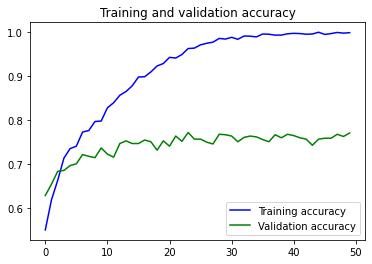

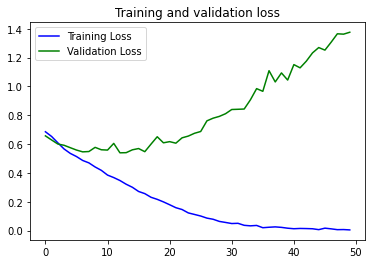

In [7]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()